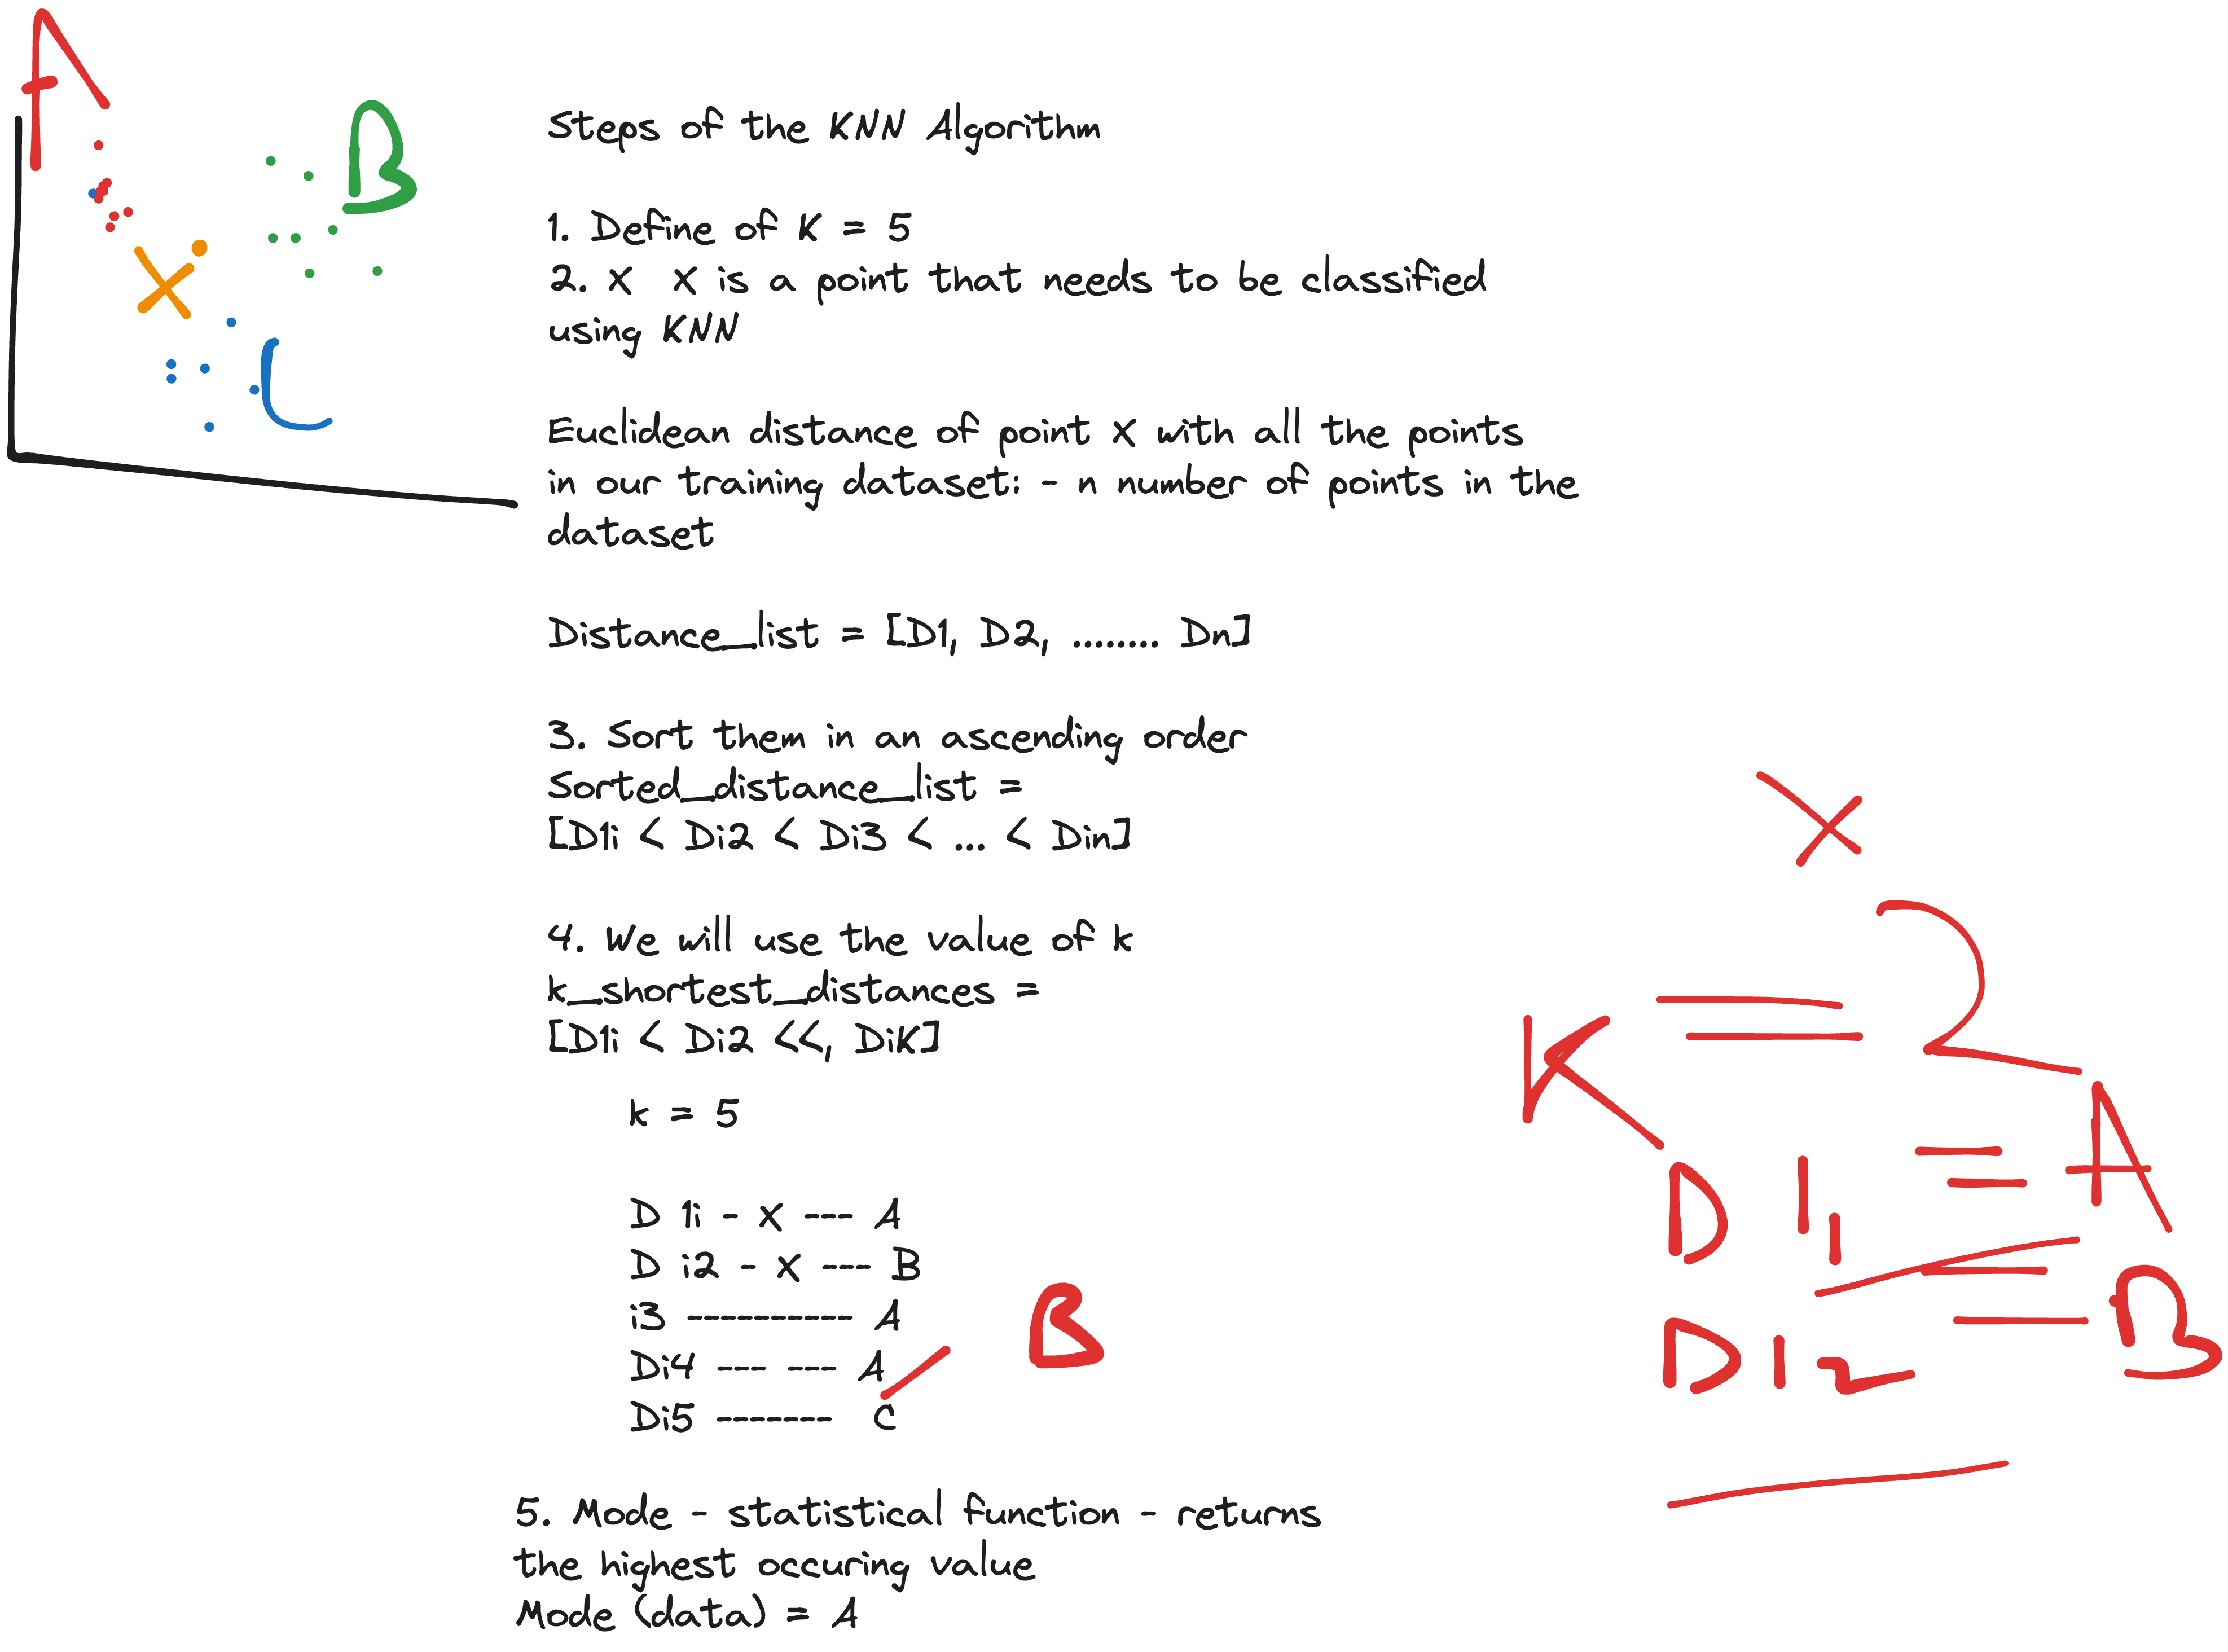

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
from sklearn.model_selection import train_test_split

print(iris)

x = iris.data
y = iris.target

# prepreocess the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
def most_common(list):
  return max(set(list), key = list.count)


In [ ]:
def euclidean(point, data):
  return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
class KNeighborsClassifier():

    def __init__(self, k=5, dist_metric = euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        neighbors = []
        for x in x_test:
          distances = self.dist_metric(x, self.x_train)
          y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
          neighbors.append(y_sorted[:self.k])

        return list(map(most_common, neighbors))


    def evaluate(self, x_test, y_test):
      y_pred = self.predict(x_test)
      accuracy = sum(y_pred == y_test) / len(y_test)
      return accuracy





<function matplotlib.pyplot.show(close=None, block=None)>

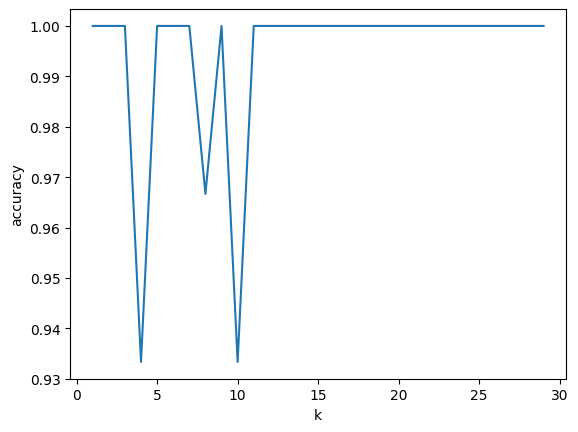

In [ ]:
accurinces = []
ks = range(1, 30)
for k in ks:
  knn = KNeighborsClassifier(k=k)
  knn.fit(x_train, y_train)
  accuracy = knn.evaluate(x_test, y_test)
  accurinces.append(accuracy)

fig, ax = plt.subplots()
ax.plot(ks, accurinces)
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
plt.show

In [ ]:
# alternative approach

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

print(iris)

x = iris.data
y = iris.target

# prepreocess the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
print(y_pred)

[2 2 1 2 2 1 2 0 1 2 2 1 2 0 0 0 0 2 1 1 1 0 1 1 0 1 0 1 2 1]


In [ ]:
print(y_test)

[2 2 2 2 2 1 2 0 1 2 2 1 2 0 0 0 0 2 1 1 1 0 1 1 0 1 0 1 2 1]
